In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numexpr
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
lora_mons_static = pd.read_pickle('../data/lora_mons_static_clean.pkl.gz')

,received,dev_id,gtw_id,frequency,data_rate,rssi,snr,battery,humidity,pressure,temperature
327,2019-04-25 20:54:20.055723+00:00,static_6_01,eui-0000024b08030186,868.5,SF10BW125,-117,0.2,4.17,54.0,100482.0,18.7
328,2019-04-25 21:14:33.641488+00:00,static_6_01,eui-0000024b08030186,867.5,SF8BW125,-106,-3.2,4.17,54.0,100489.0,18.6
329,2019-04-25 21:24:40.351978+00:00,static_6_01,eui-0000024b08030186,867.3,SF7BW125,-114,2.2,4.17,54.0,100503.0,18.5
330,2019-04-25 21:34:47.256898+00:00,static_6_01,eui-0000024b08030186,868.3,SF9BW125,-120,-6.0,4.17,54.0,100496.0,18.4
331,2019-04-25 21:44:53.763229+00:00,static_6_01,eui-0000024b08030186,867.9,SF7BW125,-117,0.8,4.17,54.0,100482.0,18.3


As this channel has the best transmission rate, the data will focus on 'static_6_03' to 'eui-0000024b08030186'.

In [101]:
gtw_mask = lora_mons_static['gtw_id'] =='eui-0000024b08030186'
dev_mask = lora_mons_static['dev_id'] == 'static_6_03'
mask = gtw_mask & dev_mask
channel = lora_mons_static.loc[mask, ['received', 'rssi', 'snr']].set_index('received').sort_index()
channel.index = channel.index.tz_convert('Europe/Brussels')
channel.head()
rssi = channel[['rssi']]
snr = channel[['snr']]

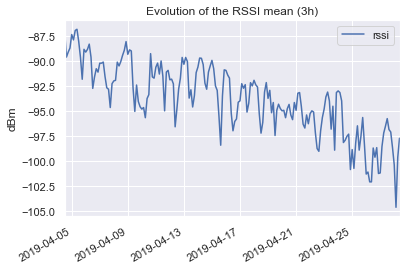

In [108]:
ax = rssi.resample('3h').mean().plot()
ax.set(xlabel='', ylabel='dBm', title='Evolution of the RSSI mean (3h)');

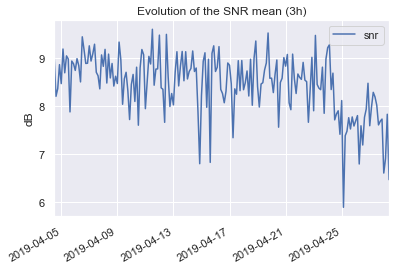

In [109]:
ax = snr.resample('3h').mean().plot()
ax.set(xlabel='', ylabel='dB', title='Evolution of the SNR mean (3h)');

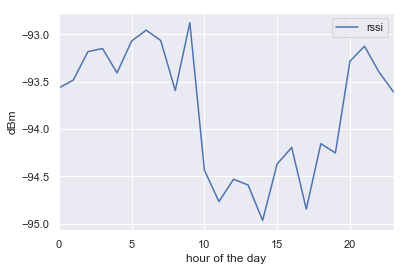

In [104]:
ax = rssi.groupby(rssi.index.hour).mean().plot()
ax.set(xlabel='hour of the day', ylabel='dBm');

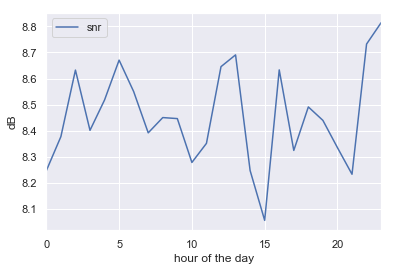

In [119]:
ax = snr.groupby(snr.index.hour).mean().plot()
ax.set(xlabel='hour of the day', ylabel='dB');

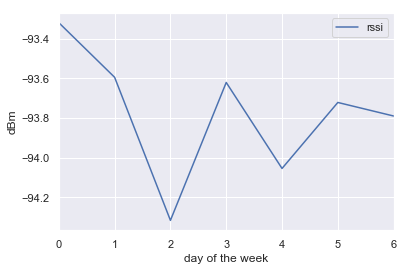

In [123]:
ax = rssi.groupby(rssi.index.weekday).mean().plot()
ax.set(xlabel='day of the week', ylabel='dBm');

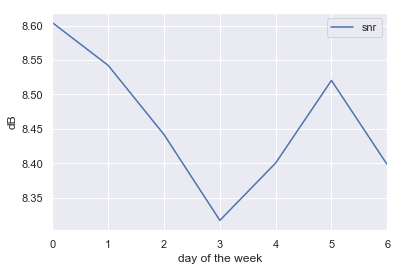

In [115]:
ax = snr.groupby(snr.index.weekday).mean().plot()
ax.set(xlabel='day of the week', ylabel='dB');